# Coffee Review Analysis

#### Background
Tim coffee X ingin mengetahui hal-hal yang mempengaruhi review pada produk coffee mereka, untuk itu mereka menyediakan informasi mengenai produk coffee dan review dari konsumen. 


#### Objective
Akan dilakukan proses identifikasi hal-hal yang berpengaruh besar terhadap hasil review dan hal apa yang perlu dilakukan agar review kedepan membaik.

#### Data
Data dapat diakses [disini](https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset/data?select=simplified_coffee.csv)
<br /> Detail fitur pada data : 
- name: Name of the blend
- roaster: Name of the roaster
- roast: Type of roast (Light, Medium-Light, Medium, Medium-Dark, Dark)
- loc_country: Location of the roaster
- origin_1: Origin of the beans
- origin_2: Origin of the beans
- 100g_USD: price per 100g of beans in US dolalrs
- rating: Rating of the coffee
- review_date: Date of the coffee review
- desc_1: Text of review #1
- desc_2: Text of review #2
- desc_3: Text of review #3

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


### Menyiapkan data yang akan digunakan

In [2]:
coffee_df = pd.read_csv(".\simplified_coffee.csv")
coffee_df

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."
...,...,...,...,...,...,...,...,...,...
1241,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,92,November 2022,"Crisply sweet, nut-toned. Almond brittle, pie ..."
1242,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November 2022,"Chocolaty, floral-framed. Cocoa nib, honeysuck..."
1243,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November 2022,"High-toned, enticingly sweet. Black cherry, na..."
1244,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,93,November 2022,"Vibrantly sweet, subtly nuanced. Apricot, dar..."


## Data Understanding

In [3]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


Pada data review_date, belum memiliki tipe yang benar. 

In [ ]:
coffee_df.describe()

## Data Preparation / Preprocessing

In [4]:
coffee_df.isna().sum()

name            0
roaster         0
roast          12
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
dtype: int64

In [ ]:
print((12/1246)*100)

persentase data kosong pada data `roast` kurang dari 1%. Akan dihapus saja data kosongnya. 

In [5]:
coffee_df.dropna(inplace=True)
coffee_df.isna().sum()

name           0
roaster        0
roast          0
loc_country    0
origin         0
100g_USD       0
rating         0
review_date    0
review         0
dtype: int64

In [6]:
coffee_df.review_date = pd.to_datetime(coffee_df.review_date)
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         1234 non-null   object        
 1   roaster      1234 non-null   object        
 2   roast        1234 non-null   object        
 3   loc_country  1234 non-null   object        
 4   origin       1234 non-null   object        
 5   100g_USD     1234 non-null   float64       
 6   rating       1234 non-null   int64         
 7   review_date  1234 non-null   datetime64[ns]
 8   review       1234 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 96.4+ KB


In [7]:
column_categ  = coffee_df.select_dtypes(['object']).columns
for i in column_categ :
    print(coffee_df[i].value_counts())
    print("------------------------------")

Ethiopia Kayon Mountain                  6
Kona Mocca®                              5
100% Kona Bourbon Pointu Laurina         4
Guatemala Bella Carmona                  4
Bella Carmona Guatemala                  4
                                        ..
Colombia Finca La Loma Microlot          1
Ka’u Yellow Caturra Champagne Natural    1
Burundi Kibingo                          1
Indestec El Paraiso                      1
Espresso No. 3                           1
Name: name, Length: 1134, dtype: int64
------------------------------
JBC Coffee Roasters          91
Kakalove Cafe                91
Paradise Roasters            83
Dragonfly Coffee Roasters    30
Bird Rock Coffee Roasters    29
                             ..
Cloud City Coffee             1
Counter Culture Coffee        1
Fire Ridge Coffee             1
Dapper & Wise                 1
Durango Coffee Companuy       1
Name: roaster, Length: 298, dtype: int64
------------------------------
Medium-Light    904
Light        

In [8]:
for col in column_categ :
    print(col)
    print(coffee_df[col].nunique())
    print('<------------------------>')

name
1134
<------------------------>
roaster
298
<------------------------>
roast
5
<------------------------>
loc_country
12
<------------------------>
origin
27
<------------------------>
review
1234
<------------------------>


Terlihat total kategori pada tiap data object.

In [ ]:
# coffee_df.to_csv("data_coffee.csv")

### Viz Data

#### 1. Visualisasi Plot Persebaran Rating 

In [13]:
rating_df = coffee_df.copy()
rating_df = rating_df.set_index('review_date')
rating_df = rating_df.drop(['name','roaster','roast','loc_country','origin','100g_USD','review'],axis=1)
rating_df

,rating
review_date,
2017-11-01,92
2017-11-01,92
2017-11-01,94
2017-11-01,93
2017-11-01,93
...,...
2022-11-01,92
2022-11-01,93
2022-11-01,93


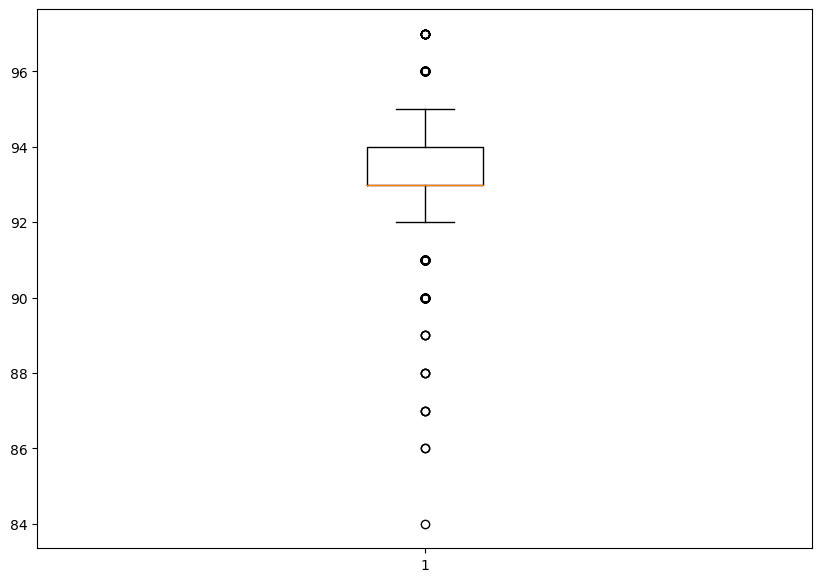

In [17]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(rating_df)
# show plot
plt.show()

In [20]:
rating_df.mean()

rating    93.300648
dtype: float64

<Axes: ylabel='Frequency'>

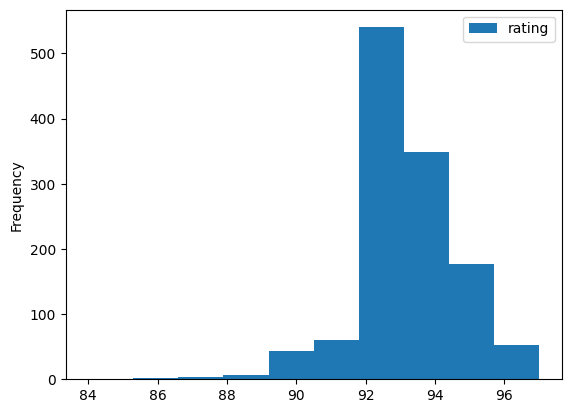

In [18]:
rating_df.plot.hist()

#### 2. Visualisasi harga terhadap rating

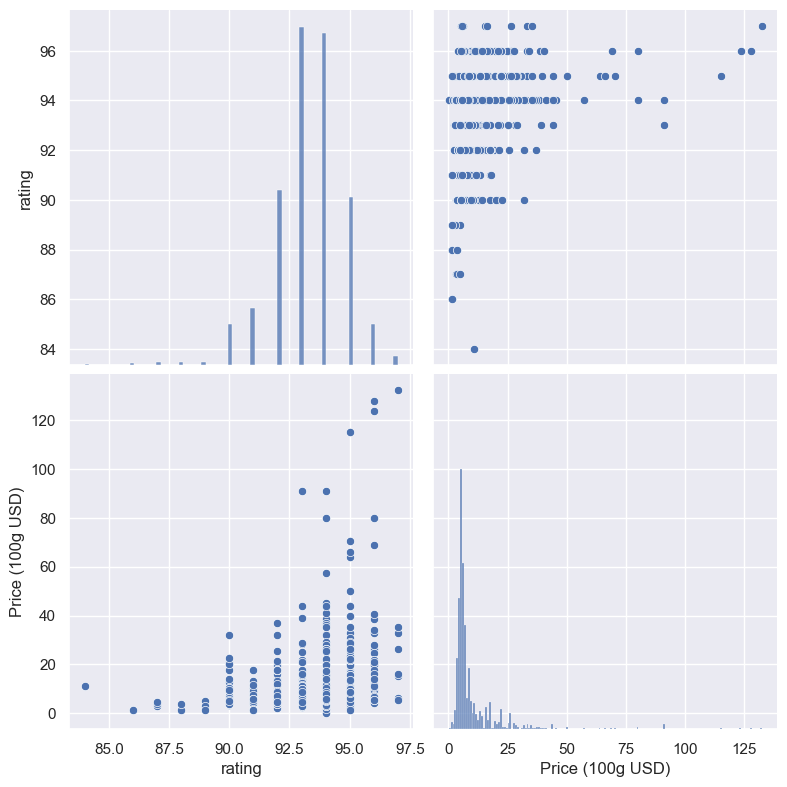

In [23]:
sns.set_theme(context="notebook")
coffee_df['Price (100g USD)'] = coffee_df['100g_USD']
coffee_df = coffee_df.drop(['100g_USD'], axis=1)
rating_price = sns.pairplot(coffee_df, height=4)

Sesuai dugaan, semakin mahal harga kopi semakin bagus ratingnya.

#### 2. Lokasi roaster terbanyak pada data

In [47]:
def pie_chart(df, col, title):
    labels = [i for i in df[col].value_counts().index]
    df[col].value_counts().plot.pie(figsize=(8,8),
                                                 pctdistance=0.4,
                                                 startangle=90,
                                                 textprops={"color": "white"},
                                                 wedgeprops={"linewidth":0},
                                   colors=['sandybrown','chocolate','brown','saddlebrown','black'])
    plt.title(title, fontsize=20, pad=5)
    plt.ylabel("")
    box = plt.gca().get_position()
    plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size":12, 
                                                                 "weight":"ultralight"})
    plt.show();

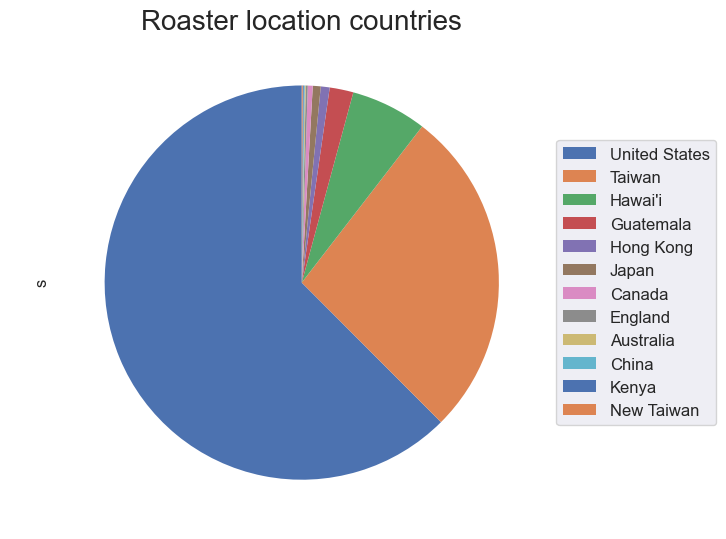

In [28]:
pie_chart(coffee_df, "loc_country", "Roaster location countries")

In [26]:
c = coffee_df['loc_country'].value_counts())
c.head(5)

United States    771
Taiwan           334
Hawai'i           77
Guatemala         24
Hong Kong          9
Japan              8
Canada             5
England            2
Australia          1
China              1
Kenya              1
New Taiwan         1
Name: loc_country, dtype: int64


#### 3. Tempat asal biji kopi terbanyak

In [ ]:
pie_chart(coffee_df, "origin", "Bean origin countries")

In [ ]:
print(coffee_df['origin'].value_counts())

#### 4. Visualisasi waktu dan rating

In [ ]:
coffee_df = coffee_df.set_index('review_date')
coffee_df.head()

In [ ]:
coffee_df['rating'].plot()

#### 5. Nama roaster paling banyak terpakai

In [31]:
roaster = coffee_df['roaster'].value_counts()
roaster_top_5 = roaster.head(5)
roaster_top_5

JBC Coffee Roasters          91
Kakalove Cafe                91
Paradise Roasters            83
Dragonfly Coffee Roasters    30
Bird Rock Coffee Roasters    29
Name: roaster, dtype: int64

#### 6. Jenis roaster paling banyak terpakai

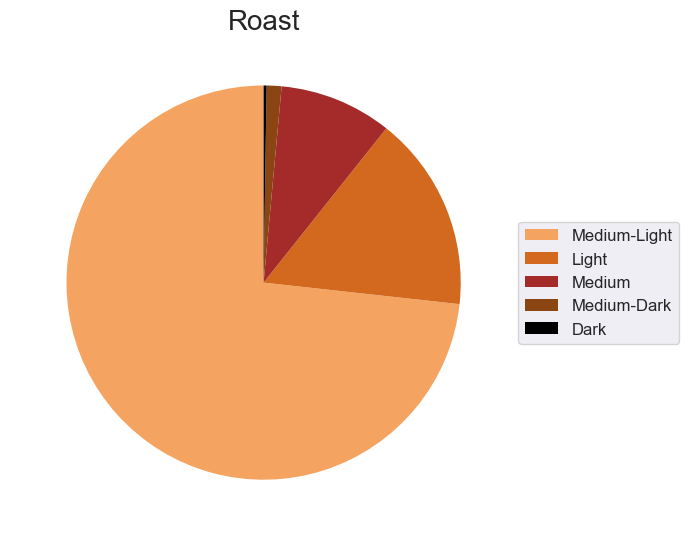

In [48]:
pie_chart(coffee_df, "roast", "Roast")

In [49]:
roast = coffee_df['roast'].value_counts()
roast

Medium-Light    904
Light           198
Medium          114
Medium-Dark      15
Dark              3
Name: roast, dtype: int64

<Axes: xlabel='count', ylabel='roast'>

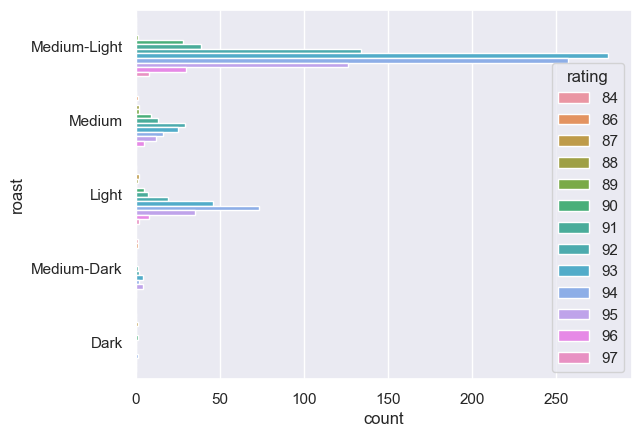

In [50]:
  sns.countplot(data=coffee_df, y = 'roast' , hue = 'rating')